In [1]:
#env:ml-s7
import numpy as np
import pandas as pd
# from icecream import ic
import subprocess
import json
import os
import plotly.graph_objects as go
from matplotlib import pyplot as plt
# import geopandas as gpd
# from shapely.geometry import Polygon
# from shapely.ops import cascaded_union, unary_union
# from shapely import geometry
# from geopy import distance
%matplotlib inline
import plotly.express as px 
from scipy import signal
from tqdm import tqdm
# from Bio import Phylo
# import ete3
import itertools
import sklearn

In [2]:
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
    in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

# Data exploration the MIC

In [16]:
df = pd.read_csv('CRyPTIC_reuse_table_20221019.csv')

In [17]:
# for x in ['AMI_PHENOTYPE_QUALITY', 'BDQ_PHENOTYPE_QUALITY',
#        'CFZ_PHENOTYPE_QUALITY', 'EMB_PHENOTYPE_QUALITY',
#        'ETH_PHENOTYPE_QUALITY', 'INH_PHENOTYPE_QUALITY',
#        'KAN_PHENOTYPE_QUALITY', 'LEV_PHENOTYPE_QUALITY',
#        'LZD_PHENOTYPE_QUALITY', 'MXF_PHENOTYPE_QUALITY',
#        'RIF_PHENOTYPE_QUALITY', 'RFB_PHENOTYPE_QUALITY']:
#     print(df[x].value_counts())

In [18]:
df[['AMI_BINARY_PHENOTYPE',	'BDQ_BINARY_PHENOTYPE',	'CFZ_BINARY_PHENOTYPE']].value_counts()

AMI_BINARY_PHENOTYPE  BDQ_BINARY_PHENOTYPE  CFZ_BINARY_PHENOTYPE
S                     S                     S                       10389
R                     S                     S                         736
S                     S                     R                         363
R                     S                     R                          96
S                     R                     S                          45
                                            R                          38
R                     R                     R                          16
                                            S                           5
dtype: int64

In [6]:
# ar = df[['AMI_PHENOTYPE_QUALITY', 'BDQ_PHENOTYPE_QUALITY',
#        'CFZ_PHENOTYPE_QUALITY', 'EMB_PHENOTYPE_QUALITY',
#        'ETH_PHENOTYPE_QUALITY', 'INH_PHENOTYPE_QUALITY',
#        'KAN_PHENOTYPE_QUALITY', 'LEV_PHENOTYPE_QUALITY',
#        'LZD_PHENOTYPE_QUALITY', 'MXF_PHENOTYPE_QUALITY',
#        'RIF_PHENOTYPE_QUALITY', 'RFB_PHENOTYPE_QUALITY']].values

# list_2d = [element for row in ar for element in row]
# print(value_counts_list(list_2d))

In [7]:
# for x in ['AMI_MIC', 'BDQ_MIC','CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC',
#        'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC']:
#     print(df[x].value_counts())

In [8]:
# Data provided by the user
# data = {
#     'AMI_MIC': {'<=0.25': 7072, '0.5': 3510, '1': 604, '>8': 393, '>16': 286, '2': 94, '16': 42, '4': 35, '8': 32},
#     'BDQ_MIC': {'0.03': 4156, '0.06': 3815, '<=0.015': 1477, '0.015': 1053, '0.12': 790, '<=0.008': 420, '0.25': 244, '0.5': 65, '1': 28, '>2': 8, '>1': 5, '2': 3},
#     'CFZ_MIC': {'<=0.06': 3986, '0.12': 2745, '0.06': 2170, '<=0.03': 1408, '0.25': 1211, '0.5': 339, '1': 126, '2': 37, '4': 9, '>4': 8, '>2': 6},
#     'DLM_MIC': {'<=0.015': 4811, '<=0.008': 2889, '0.015': 1787, '0.03': 1373, '0.06': 639

# df1 = pd.DataFrame(list(data.items()))


In [ ]:
# Data provided by the user
# data = {
#     '0.5': 21599, '<=0.06': 14544, '2': 13432, '0.25': 13103, '1': 12719, '0.12': 9420,
#     '0.06': 8132, '<=0.25': 7382, '<=0.015': 6288, '4': 5803, '0.03': 5529, '>8': 3931,
#     '<=1': 3540, '0.05': 3426, '8': 3398, '<=0.008': 3309, '>2': 3157, '>4': 2856,
#     '0.015': 2840, '<=0.025': 2458, 'nan': 2356, '<=0.03': 2237, '>1.6': 1647, '1.6': 1426,
#     '>16': 1026, '3.2': 890, '<=0.12': 435, '16': 423, '6.4': 373, '0.2': 366, '0.8': 349,
#     '0.4': 307, '>12.8': 294, '0.1': 275, '12.8': 255, '32': 80, '>1': 56, '>0.5': 30, '>32': 14
# }

# # Import pandas and create a DataFrame
# import pandas as pd

# # Convert the dictionary to a DataFrame
# df = pd.DataFrame(list(data.items()), columns=['Key', 'Value'])

# df  # Display the first few rows of the DataFrame


In [19]:
ar = df[['AMI_MIC', 'BDQ_MIC','CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC', 'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC']].values

list_2d = [element for row in ar for element in row]
print(np.unique(list_2d))
print(value_counts_list(list_2d))

['0.015' '0.03' '0.05' '0.06' '0.1' '0.12' '0.2' '0.25' '0.4' '0.5' '0.8'
 '1' '1.6' '12.8' '16' '2' '3.2' '32' '4' '6.4' '8' '<=0.008' '<=0.015'
 '<=0.025' '<=0.03' '<=0.06' '<=0.12' '<=0.25' '<=1' '>0.5' '>1' '>1.6'
 '>12.8' '>16' '>2' '>32' '>4' '>8' 'nan']
{'0.5': 21599, '<=0.06': 14544, '2': 13432, '0.25': 13103, '1': 12719, '0.12': 9420, '0.06': 8132, '<=0.25': 7382, '<=0.015': 6288, '4': 5803, '0.03': 5529, '>8': 3931, '<=1': 3540, '0.05': 3426, '8': 3398, '<=0.008': 3309, '>2': 3157, '>4': 2856, '0.015': 2840, '<=0.025': 2458, nan: 2356, '<=0.03': 2237, '>1.6': 1647, '1.6': 1426, '>16': 1026, '3.2': 890, '<=0.12': 435, '16': 423, '6.4': 373, '0.2': 366, '0.8': 349, '0.4': 307, '>12.8': 294, '0.1': 275, '12.8': 255, '32': 80, '>1': 56, '>0.5': 30, '>32': 14}


['<=0.008', '<=0.015', '0.015', '<=0.025', '0.03', '<=0.03', '0.05', '0.06', '<=0.06', '0.1', '0.12', '<=0.12', '0.2', '0.25', '<=0.25', '0.4', '<=1', '>0.5', '>1', '>1.6', '0.5', '0.8', '>4', '1', '>8', '1.6', '2', '3.2', '4', '6.4', '8', '12.8', '16', '>12.8', '>16', '>32', '>2', '32']


In [ ]:
# # below code removes values that are the edge cases of the MIC values
# for i, row in df.iterrows():
#     for x in ['AMI_MIC', 'BDQ_MIC', 'CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC', 'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC']:
#         if row[x] in ['<=0.008', '<=0.015', '<=0.025', '<=0.03', '<=0.06','<=0.12','<=0.25']:
#             df.loc[i, f'{x}'] = '<=0.25'
#         elif row[x] in ['>8', '12.8', '>12.8', '16', '>16', '32', '>32' ]:
#             df.loc[i, f'{x}'] = '>32'
#         elif row[x] in ['>0.5','<=1','>1','>1.6','>2','>4']:
#             df.loc[i, f'{x}'] = float('nan')

In [20]:
# below code removes values that are the edge cases of the MIC values

for i, row in df.iterrows():
    x = 'AMI_MIC'
    if row[x] == '<=0.25' :
        df.loc[i, f'{x}'] = '0.125'
    elif row[x] == '>16':
        df.loc[i, f'{x}'] = '32'
    elif row[x] == '>8':
        df.loc[i, f'{x}'] = '16'    

    x = 'BDQ_MIC'
    if row[x] == '<=0.015' :
        df.loc[i, f'{x}'] = '0.0075'
    elif row[x] == '<=0.008' :
        df.loc[i, f'{x}'] = '0.004'
    elif row[x] == '>1':
        df.loc[i, f'{x}'] = '2'    
    elif row[x] == '>2':
        df.loc[i, f'{x}'] = '4'
        
    x = 'CFZ_MIC'
    if row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.03'
    elif row[x] == '<=0.03':
        df.loc[i, f'{x}'] = '0.015'
    elif row[x] == '>2': #! there is middle value between two ranges
        df.loc[i, f'{x}'] = '4'
    elif row[x] == '>4':
        df.loc[i, f'{x}'] = '8'
        
    x = 'DLM_MIC'
    if row[x] == '<=0.015' :
        df.loc[i, f'{x}'] = '0.0075'
    elif row[x] == '<=0.008':
        df.loc[i, f'{x}'] = '0.004'
    elif row[x] == '>1':
        df.loc[i, f'{x}'] = '2' #! there is middle value between two ranges, should i turn these range values in the middle into nan
    elif row[x] == '>0.5':
        df.loc[i, f'{x}'] = '1.0'
    
    x = 'EMB_MIC'
    if row[x] == '<=0.25' :
        df.loc[i, f'{x}'] = '0.125'
    elif row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.03'
    elif row[x] == '>8':
        df.loc[i, f'{x}'] = '16'
    elif row[x] == '>32':
        df.loc[i, f'{x}'] = '64'     
           
    x = 'ETH_MIC'
    if row[x] == '<=0.25' :
        df.loc[i, f'{x}'] = '0.125'
    elif row[x] == '>8':
        df.loc[i, f'{x}'] = '16'
        
    x = 'INH_MIC'
    if row[x] == '<=0.025' :
        df.loc[i, f'{x}'] = '0.01125'
    elif row[x] == '>12.8':
        df.loc[i, f'{x}'] = '25.6'
    elif row[x] == '>1.6':
        df.loc[i, f'{x}'] = '3.2'         
        
    x = 'KAN_MIC'
    if row[x] == '<=1' :
        df.loc[i, f'{x}'] = '0.5'
    elif row[x] == '>16':
        df.loc[i, f'{x}'] = '32'   

    x = 'LEV_MIC'
    if row[x] == '<=0.12' :
        df.loc[i, f'{x}'] = '0.06'
    elif row[x] == '>8':
        df.loc[i, f'{x}'] = '16'

    x = 'LZD_MIC'
    if row[x] == '<=0.03' :
        df.loc[i, f'{x}'] = '0.15'
    elif row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.03'
    elif row[x] == '>2':
        df.loc[i, f'{x}'] = '4'
    elif row[x] == '>4':
        df.loc[i, f'{x}'] = '8'                                                                                     

    x = 'MXF_MIC'
    if row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.03'
    elif row[x] == '>4':
        df.loc[i, f'{x}'] = '8'    
    
    x = 'RIF_MIC'
    if row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.03'
    elif row[x] == '<=0.03':
        df.loc[i, f'{x}'] = '0.015'    
    elif row[x] == '>8':
        df.loc[i, f'{x}'] = '16'   
    elif row[x] == '>4':
        df.loc[i, f'{x}'] = '8'
        
        
    x = 'RFB_MIC'
    if row[x] == '<=0.06' :
        df.loc[i, f'{x}'] = '0.03'
    elif row[x] == '>2':
        df.loc[i, f'{x}'] = '4'    

In [23]:
for x in ['AMI_MIC', 'BDQ_MIC',
       'CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC',
       'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC']:
    print(df[x].unique())
# df['RIF_MIC'].unique()

['0.125' '0.5' '1' '16' '4' '2' '8' nan '32']
[nan '0.06' '0.03' '0.25' '0.0075' '0.5' '0.12' '2' '4' '0.015' '0.004'
 '1']
['0.03' '0.12' '0.25' '0.5' '2' '1' '4' nan '8' '0.015' '0.06']
['0.0075' nan '0.03' '0.06' '0.12' '2' '0.5' '0.25' '1' '0.004' '0.015'
 '1.0']
['1' '2' '0.5' '4' '16' '8' nan '0.25' '0.03' '0.12' '64' '32' '0.125']
['2' '1' '4' '16' '0.5' '8' '0.125' nan]
['0.05' '0.01125' '0.2' '0.1' '3.2' '1.6' nan '0.8' '0.4' '12.8' '25.6'
 '6.4']
['2' '0.5' '32' '16' '4' nan '8']
['0.25' '1' '0.5' '0.06' '2' '8' '16' '4' nan]
['0.25' '0.5' '1' '2' '4' '0.12' nan '0.15' '0.06' '0.03' '8']
['0.25' '0.5' '0.12' '2' '4' '1' '8' '0.03' nan]
['0.03' '0.12' '8' '4' '2' '0.25' '0.5' nan '1' '16' '0.06' '0.015']
['0.03' '4' '0.12' '0.5' '2' '0.25' '1' nan]


In [24]:
ar = df[['AMI_MIC', 'BDQ_MIC','CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC', 'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC']].values

list_2d = [element for row in ar for element in row]
print(value_counts_list(list_2d))

{'0.5': 25139, '0.03': 20073, '2': 13488, '0.25': 13103, '1': 12719, '0.12': 9420, '4': 8960, '0.06': 8567, '0.125': 7382, '0.0075': 6288, '8': 6254, '0.015': 5001, '16': 4354, '0.05': 3426, '0.004': 3309, '3.2': 2537, '0.01125': 2458, nan: 2356, '1.6': 1426, '32': 1106, '6.4': 373, '0.2': 366, '0.8': 349, '0.4': 307, '25.6': 294, '0.1': 275, '12.8': 255, '0.15': 76, '1.0': 30, '64': 14}


In [25]:
drug_names = {
    'AMI': 'Amikacin',
    'BDQ': 'Bedaquiline',
    'CFZ': 'Clofazimine',
    'EMB': 'Ethambutol',
    'ETH': 'Ethionamide',
    'INH': 'Isoniazid', # the critical concentration would be 0.0312 mg/liter for low-level resistance and 0.125 mg/liter for high-level resistance
    'KAN': 'Kanamycin',
    'LEV': 'Levofloxacin',
    'LZD': 'Linezolid',
    'MXF': 'Moxifloxacin',
    'RIF': 'Rifampicin',
    'RFB': 'Rifabutin'
}

In [12]:
# # below code removes all MIC values with low quality
# for i, row in df.iterrows():
#     for x in ['AMI', 'BDQ', 'CFZ', 'EMB', 'ETH', 'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF', 'RFB']:
#         if row[f'{x}_PHENOTYPE_QUALITY'] == 'LOW':
#             df.loc[i, f'{x}_MIC'] = float('nan')
#             # print(df.loc[i, f'{x}_MIC'])

### res data output

In [27]:
# check if the range values are removed
for x in ['AMI', 'BDQ', 'CFZ', 'EMB', 'ETH', 'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF', 'RFB']:
    print(f'{x}_MIC')
    print(df[f'{x}_MIC'].unique())

AMI_MIC
['0.25' '0.5' '1' '8' '4' '2' nan '16']
BDQ_MIC
[nan '0.06' '0.03' '0.25' '0.005' '0.5' '0.12' '2' '0.015' '0.008' '1']
CFZ_MIC
['0.06' '0.12' '0.25' '0.5' '2' '1' '4' nan '0.03']
EMB_MIC
['1' '2' '0.5' '4' '8' nan '0.25' '0.06' '0.12' '16' '32']
ETH_MIC
['2' '1' '4' '8' '0.5' '0.25' nan]
INH_MIC
['0.05' '0.025' '0.2' '0.1' '1.6' nan '0.8' '0.4' '3.2' '12.8' '6.4']
KAN_MIC
['2' '1' '16' '4' nan '8']
LEV_MIC
['0.25' '1' '0.5' '0.12' '2' '8' '4' nan]
LZD_MIC
['0.25' '0.5' '1' '2' '0.12' nan '0.03' '0.06' '4' 5]
MXF_MIC
['0.25' '0.5' '0.12' '2' '4' '1' 5 '0.06' nan]
RIF_MIC
['0.06' '0.12' '4' '2' '0.25' '0.5' nan '1' '8' '0.03']
RFB_MIC
['0.06' '3' '0.12' '0.5' '2' '0.25' '1' nan]


In [27]:
df.sort_values(by=['wgs_id'], inplace=True)
df.to_csv('data1/CRyPTIC_reuse_table_20221019_cleaned.csv', index=False)

In [28]:
mic = df.iloc[:,14:27].astype('float')

In [29]:
mic

,AMI_MIC,BDQ_MIC,CFZ_MIC,DLM_MIC,EMB_MIC,ETH_MIC,INH_MIC,KAN_MIC,LEV_MIC,LZD_MIC,MXF_MIC,RIF_MIC,RFB_MIC
5839,0.500,0.060,0.120,0.0300,2.0,2.0,0.05,2.0,0.50,0.50,0.50,0.12,0.03
5840,0.500,0.060,0.030,0.0075,2.0,1.0,0.05,2.0,0.50,0.50,0.25,0.12,0.03
5841,0.125,0.060,0.030,0.0075,2.0,2.0,0.05,2.0,0.25,0.50,0.25,0.03,0.03
5842,0.500,0.060,0.120,0.0075,1.0,NaN,0.05,4.0,1.00,1.00,0.50,0.12,0.03
5843,0.125,0.060,0.120,0.0075,2.0,1.0,0.10,2.0,0.25,0.50,0.25,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0.125,0.015,0.015,0.0040,8.0,16.0,25.60,2.0,2.00,0.25,0.50,16.00,4.00
11395,0.125,0.030,0.060,0.0040,4.0,4.0,6.40,2.0,8.00,0.25,8.00,16.00,4.00
11397,1.000,0.030,0.060,0.0150,4.0,8.0,12.80,16.0,0.50,0.50,0.25,16.00,4.00
11398,0.500,0.015,0.060,0.0150,0.5,8.0,0.20,2.0,0.25,0.12,0.12,0.06,4.00


In [34]:
mic.shape

(12285, 13)

In [31]:
mic.iloc[:int(mic.shape[0]*0.9),:].shape

(11056, 13)

In [32]:
mic.iloc[:int(mic.shape[0]*0.9),:].to_csv('data1/res_train.csv', index=False)
mic.iloc[int(mic.shape[0]*0.9):,:].to_csv('data1/res_test.csv', index=False)

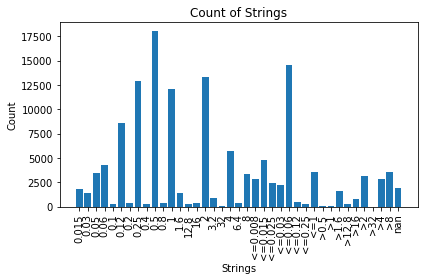

In [147]:
import plotly.graph_objects as go
from collections import Counter

unique_strings, counts = np.unique(ar_list, return_counts=True)
plt.bar(unique_strings, counts)
plt.xlabel("Strings")
plt.ylabel("Count")
plt.title("Count of Strings")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()
plt.show()

In [13]:
np.unique(df[['CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC',
       'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC']].values)

TypeError: '<' not supported between instances of 'float' and 'str'

In [24]:
# File path to save the output
file_path = "sample_list.txt"

# Open the file in write mode
with open(file_path, 'w') as file:
    # Write each string from the list to a new line in the file
    for string in df['wgs_id'].tolist():
        file.write(string + '\n')


In [ ]:
for x in tqdm(df['wgs_id']):
    print(x)
    # break

In [ ]:
import subprocess
for x in df['wgs_id']:
    fasta_file = "/mnt/storageG1/lwang/Projects/tb_dr_MIC/MTB-h37rv_asm19595v2-eg18.fa"
    vcf_file = f"/mnt/storage7/jody/tb_ena/per_sample/{x}.freebayes.vcf.gz"
    output_file = f"/mnt/storageG1/lwang/Projects/tb_dr_MIC/fasta/{x}.fa"
    command = ["bcftools", "consensus", "-f", fasta_file, vcf_file, "-o", output_file]
    # Run the command using subprocess
    subprocess.run(command)
    
    #Run the command using subprocess
    # subprocess.run(
    #     f"bcftools consensus -f", fasta_file, vcf_file, "-o", output_file,
    #     shell=False,
    # )

# Generating Sequence data

In [66]:
from Bio import SeqIO
import csv
from Bio.SeqUtils import six_frame_translations

df_seq = pd.DataFrame(columns=['wgs_id','acpM-kasA', 'ethAR', 'aftB-ubiA', 'tlyA', 'embCAB', 'gid', 'panD',
       'rpoBC', 'rpsA', 'katG', 'rpsL', 'pncA', 'clpC', 'gyrBA',
       'oxyR-ahpC', 'eis', 'rrs-rrl', 'fabG1-inhA'])

for x in df['wgs_id']:
    fasta_file = '/mnt/storageG1/lwang/Projects/tb_dr_MIC/fasta/ERR2184202.fa'
    bed_file = '/mnt/storageG1/lwang/Projects/tb_dr_MIC/gene_ordered.csv'
    output_file = 'output.csv'

    sequences = [x]
    df_gene = pd.read_csv('gene_ordered.csv')
    for i, row in df_gene.iterrows():
        # print(row)
        locus, start, end = row[0], int(row[1]), int(row[2])
        
        # Extract the sequence based on the range
        with open(fasta_file, 'r') as fasta:
            record_dict = SeqIO.to_dict(SeqIO.parse(fasta, 'fasta'))
            sequence = record_dict['Chromosome'].seq[start:end]
            sequences.append(str(sequence))
            
    df_seq.loc[df_seq.shape[0]] = sequences

In [105]:
df_seq.sort_values(by=['wgs_id'], inplace=True)

In [106]:
df_seq.to_csv('gene_seq.csv', index=False)

In [68]:
df_seq = pd.read_csv('gene_seq.csv')

### seq data output

In [107]:
df_seq.iloc[:int(df_seq.shape[0]*0.9),:].to_csv('gene_seq_train.csv', index=False)
df_seq.iloc[int(df_seq.shape[0]*0.9):,:].to_csv('gene_seq_test.csv', index=False)